# CH-04 ËÆì AI Ë®àÁÆóÊäÄË°ìÊåáÊ®ôÂèäË≥áÊñôË¶ñË¶∫Âåñ

## 4-1 ÊäÄË°ìÊåáÊ®ôÂÖ¨ÂºèÂ§™Ë§áÈõúÔºüËÆì AI Ëá™ÂãïÂåñË®àÁÆó

### 1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [1]:
!pip install openai
!pip install yfinance -U

In [2]:
from  openai import OpenAI, OpenAIError # ‰∏≤Êé• OpenAI API
import yfinance as yf
import pandas as pd # Ë≥áÊñôËôïÁêÜÂ•ó‰ª∂
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂

### 2Ô∏è‚É£ ÂèñÂæóËÇ°Á•®Ë≥áÊñô

In [3]:
# Ëº∏ÂÖ•ËÇ°Á•®‰ª£Ëôü
stock_id = "2330.tw"
# ÊäìÂèñÂçäÂπ¥Ë≥áÊñô
end = dt.date.today() # Ë≥áÊñôÁµêÊùüÊôÇÈñì
start = end - dt.timedelta(days=180) # Ë≥áÊñôÈñãÂßãÊôÇÈñì

#df = yf.download(stock_id, start=start, end=end).reset_index()
df = yf.Ticker(stock_id).history(start=start, end=end)
df.tail()

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits  
Date                                                
2025-10-13 00:00:00+08:00        0.0           0.0  
2025-10-14 00:00:00+08:00        0.0           0.0  
2025-10-15 00:00:00+08:00        0.0           0.0  
2025-10-16 00:00:00+08:00        0.0           0.0  
2025-10-17 00:00:00+08:00        0.0           0.0

### 3Ô∏è‚É£ Ëº∏ÂÖ• GEMINI API KEY

In [4]:
from google.colab import userdata

client = OpenAI(
    api_key=userdata.get('GEMINI_API_KEY'),
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

### 4Ô∏è‚É£ ÂâµÂª∫ Gemini 2.5 Flash Ê®°ÂûãÂáΩÂºè

In [5]:
def get_reply(messages):
  try:
    response = client.chat.completions.create(model="gemini-2.5-flash", messages=messages)
    reply = response.choices[0].message.content
  except OpenAIError as err:
    reply = f"ÁôºÁîü {err.type} ÈåØË™§\n{err.message}"
  return reply

# Ë®≠ÂÆö AI ËßíËâ≤, ‰ΩøÂÖ∂‰æùÊìö‰ΩøÁî®ËÄÖÈúÄÊ±ÇÈÄ≤Ë°å df ËôïÁêÜ
def ai_helper(df, user_msg):

  msg = [{
    "role":
    "system",
    "content":
    f"As a professional code generation robot, \
      I require your assistance in generating Python code \
      based on specific user requirements. To proceed, \
      I will provide you with a dataframe (df) that follows the \
      format {df.columns}. Your task is to carefully analyze the \
      user's requirements and generate the Python code \
      accordingly.Please note that your response should solely \
      consist of the code itself, \
      and no additional information should be included."
  }, {
    "role":
    "user",
    "content":
    f"The user requirement:{user_msg} \n\
       Your task is to develop a Python function named \
      'calculate(df)'. This function should accept a dataframe as \
      its parameter. Ensure that you only utilize the columns \
      present in the dataset, specifically {df.columns}. \
      After processing, the function should return the processed \
      dataframe. Your response should strictly contain the Python \
      code for the 'calculate(df)' function \
      and exclude any unrelated content."
  }]

  reply_data = get_reply(msg)
  cleaned_code = reply_data.replace("```", "")
  cleaned_code = cleaned_code.replace("python", "")

  return cleaned_code

### ËÆì AI Ëá™ÂãïÁîüÊàêÊäÄË°ìÊåáÊ®ôÁ®ãÂºèÁ¢º

### 5Ô∏è‚É£ Ë®àÁÆóÁßªÂãïÂπ≥ÂùáÁ∑ö

In [6]:
code_str = ai_helper(df, "Ë®àÁÆó8Êó•MAËàá13Êó•MA ")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df):
    """
    Calculates the 8-day Moving Average (MA_8) and 13-day Moving Average (MA_13)
    based on the 'Close' price of the input DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame with at least a 'Close' column.

    Returns:
    pd.DataFrame: The DataFrame with 'MA_8' and 'MA_13' columns added.
    """
    df['MA_8'] = df['Close'].rolling(window=8).mean()
    df['MA_13'] = df['Close'].rolling(window=13).mean()
    return df



Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits     MA_8        MA_13  
Date                                                                      
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846  
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846  
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231  
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077  
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077

### 6Ô∏è‚É£ Ë®àÁÆó MACD

In [7]:
code_str = ai_helper(df, "ÂÖàË®àÁÆó EMA ÂÜçË®àÁÆó MACD, Ê¨Ñ‰ΩçÂêçÁ®±Áî® MACD_Histogram ÂëΩÂêç")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the Exponential Moving Averages (EMA), MACD Line, Signal Line,
    and MACD Histogram for a given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'Close' prices.

    Returns:
        pd.DataFrame: The DataFrame with 'MACD_Histogram' column added.
    """
    # Define periods for MACD calculation
    short_period = 12
    long_period = 26
    signal_period = 9

    # Calculate 12-period EMA
    df['EMA_12'] = df['Close'].ewm(span=short_period, adjust=False).mean()

    # Calculate 26-period EMA
    df['EMA_26'] = df['Close'].ewm(span=long_period, adjust=False).mean()

    # Calculate MACD Line
    df['MACD_Line'] = df['EMA_12'] - df['EMA_26']

    # Calculate Signal Line (9-period EMA of MACD Line)
    df['Signal_Line'] = df['MACD_Line'].ewm(span=signal_period, adjust=False).mean()

    # Calculate MACD Histogram
    df['MACD_Histogram'] = df['MACD_Line'] - df['

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits     MA_8        MA_13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                EMA_12       EMA_26  MACD_Line  Signal_Line  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram  
Date                                       
2025-10-13 00:00:00+08:00        8.330076  
2025-10-14 00:00:00+08:00        6.637946  
2025-10-15 00:00:00+08:00        7.305553  
2025-10-16 00:00:00+08:00        8.124198  
2025-10-17 00:00:00+08:00        5.466107

### 7Ô∏è‚É£ Ë®àÁÆó RSI

In [8]:
code_str = ai_helper(df, "Ë®àÁÆó RSI ")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the Relative Strength Index (RSI) for a given DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame with a 'Close' price column.

    Returns:
    pd.DataFrame: The DataFrame with the 'RSI' column added.
    """
    period = 14  # Standard RSI period

    # Calculate daily price changes
    delta = df['Close'].diff()

    # Separate gains (up) and losses (down)
    # Gains are positive deltas, losses are negative deltas made positive
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)

    # Calculate the exponential moving average of gains and losses
    # Using com = period - 1 for consistency with standard RSI calculation (alpha = 1/period)
    # adjust=False ensures the EMA formula is (1-alpha)*prev_ema + alpha*current_value
    # min_periods=period ensures that the first average is effectively a simple average
    # over 'period' values before the EMA

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits     MA_8        MA_13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                EMA_12       EMA_26  MACD_Line  Signal_Line  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram        RSI  
Date                                                  
2025-10-13 00:00:00+08:00        8.330076  69.305693  
2025-10-14 00:00:00+08:00        6.637946  70.378682  
2025-10-15 00:00:00+08:00        7.305553  74.255431  
2025-10-16 00:00:00+08:00        8.124198  75.950269  
2025-10-17 00:00:00+08:00        5.466107  67.567231

### 8Ô∏è‚É£ Ë®àÁÆóÂ∏ÉÊûóÈÄöÈÅì

In [9]:
code_str = ai_helper(df, "Ë´ãË®àÁÆó1.5ÂÄãÊ®ôÊ∫ñÂ∑ÆÁöÑÂ∏ÉÊûóÈÄöÈÅì, Ê¨Ñ‰Ωç‰ª• Upper_Band Âíå Lower_Band ÂëΩÂêç")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates Bollinger Bands with 1.5 standard deviations.

    The function uses a 20-period Simple Moving Average (SMA) and a 20-period
    standard deviation of the 'Close' price to compute the Upper and Lower Bands.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'Close' prices
                           and other columns.

    Returns:
        pd.DataFrame: The DataFrame with 'Upper_Band' and 'Lower_Band' columns added.
    """
    window = 20
    std_multiplier = 1.5

    # Calculate the 20-period Simple Moving Average (middle band)
    df['SMA_20'] = df['Close'].rolling(window=window).mean()

    # Calculate the 20-period rolling standard deviation
    df['Rolling_Std_20'] = df['Close'].rolling(window=window).std()

    # Calculate the Upper_Band
    df['Upper_Band'] = df['SMA_20'] + (df['Rolling_Std_20'] * std_multiplier)

    # Calculate the Lower_Band
    df['Lower_Band'] = d

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits     MA_8        MA_13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                EMA_12       EMA_26  MACD_Line  Signal_Line  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram        RSI   Upper_Band   Lower_Band  
Date                                                                            
2025-10-13 00:00:00+08:00        8.330076  69.305693  1424.166987  1228.836992  
2025-10-14 00:00:00+08:00        6.637946  70.378682  1433.382472  1238.615538  
2025-10-15 00:00:00+08:00        7.305553  74.255431  1448.557453  1244.442547  
2025-10-16 00:00:00+08:00        8.124198  75.950269  1464.351599  1252.148401  
2025-10-17 00:00:00+08:00        5.466107  67.567231  1473.324890  1260.175110

### 9Ô∏è‚É£ ËÉΩÈáèÊΩÆÊåáÊ®ô (On-Balance Volumem, OBV)

In [10]:
import numpy as np
code_str = ai_helper(df, "Ë®àÁÆó OBV ÊåáÊ®ô")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd
import numpy as np

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the On-Balance Volume (OBV) indicator for a given DataFrame.

    The OBV is calculated based on the following rules:
    - If the current Close price is higher than the previous Close price,
      the current Volume is added to the previous OBV.
    - If the current Close price is lower than the previous Close price,
      the current Volume is subtracted from the previous OBV.
    - If the current Close price is equal to the previous Close price,
      the OBV remains unchanged.

    The first OBV value is typically initialized to 0, and subsequent values
    are calculated based on price movements and volume.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'Close' and 'Volume' columns.

    Returns:
        pd.DataFrame: The DataFrame with the 'OBV' column added.
    """
    
    # Calculate the daily change in OBV based on price movement and volume
 

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits     MA_8        MA_13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                EMA_12       EMA_26  MACD_Line  Signal_Line  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram        RSI       SMA_20  \
Date                                                                
2025-10-13 00:00:00+08:00        8.330076  69.305693  1326.501990   
2025-10-14 00:00:00+08:00        6.637946  70.378682  1335.999005   
2025-10-15 00:00:00+08:00        7.305553  74.255431  1346.500000   
2025-10-16 00:00:00+08:00        8.124198  75.950269  1358.250000   
2025-10-17 00:00:00+08:00        5.466107  67.567231  1366.750000   

                           Rolling_Std_20   Upper_Band   Lower_Band  \
Date                                                                  
2025-10-13 00:00:00+08:00       65.109998  1424.166987  1228.836992   
2025-10-14 00:00:00+08:00       64.922311  1433.382472  1238.615538   
2025-10-15 00:00:00+08:00       68.038302  1448.557453  1244.442547   
2025-10-16 00:00:00+08:00       70.734399  1464.351599  1252.148401   
2025-10-17 00:00:00+08:00       71.049927  1473.324890  1260.175110   

                                  OBV  
Date                                   
2025-10-13 00:00:00+08:00   918434351  
2025-10-14 00:00:00+08:00   958323607  
2025-10-15 00:00:00+08:00   999380012  
2025-10-16 00:00:00+08:00  1037117690  
2025-10-17 00:00:00+08:00   999040359

### ËÆì AI Ëá™ÂãïÁµ±Êï¥ Dataframe

### üîü Â∞áÊó•È†ªË≥áÊñôËΩâÊèõÊàêÊúàÈ†ªË≥áÊñô

In [11]:
code_str = ai_helper(df, "Ë´ãÂ∞áÊó•KÁ∑öÁöÑË≥áÊñôËΩâÊèõÊàêÊúàKÁ∑ö ")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = df
df_monthly = new_df
df_monthly = calculate(df_monthly)
df_monthly.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    # Ensure the DataFrame's index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Define aggregation rules for each column
    # For OHLC, specific aggregations are used.
    # For Volume, Dividends, Stock Splits, sum is used as they represent cumulative events/quantities.
    # For technical indicators (MA, EMA, MACD, RSI, Bollinger Bands, OBV),
    # the last value of the month is taken as a proxy for the monthly value.
    aggregation_rules = {
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum',
        'Dividends': 'sum',
        'Stock Splits': 'sum',
        'MA_8': 'last',
        'MA_13': 'last',
        'EMA_12': 'last',
        'EMA_26': 'last',
        'MACD_Line': 'last',
        'Signal_Line': 'last',
        'MACD_Histogram': 'last',
        'RSI': 'last',
      

<string>:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


Open         High          Low        Close  \
Date                                                                            
2025-06-30 00:00:00+08:00   950.151444  1075.697173   938.249756  1055.776855   
2025-07-31 00:00:00+08:00  1075.697167  1160.358497  1060.756905  1155.378418   
2025-08-31 00:00:00+08:00  1125.497948  1195.219116  1120.517869  1155.378418   
2025-09-30 00:00:00+08:00  1145.418282  1355.000000  1140.438180  1305.000000   
2025-10-31 00:00:00+08:00  1325.000000  1495.000000  1325.000000  1450.000000   

                              Volume  Dividends  Stock Splits         MA_8  \
Date                                                                         
2025-06-30 00:00:00+08:00  667335366   4.500020           0.0  1051.419273   
2025-07-31 00:00:00+08:00  689722354   0.000000           0.0  1140.438202   
2025-08-31 00:00:00+08:00  575596483   0.000000           0.0  1154.755936   
2025-09-30 00:00:00+08:00  621107551   5.000018           0.0  1306.250000   
2025-10-31 00:00:00+08:00  405587013   0.000000           0.0  1441.250000   

                                 MA_13       EMA_12       EMA_26  MACD_Line  \
Date                                                                          
2025-06-30 00:00:00+08:00  1045.433613  1046.165778  1018.252826  27.912953   
2025-07-31 00:00:00+08:00  1136.607366  1134.273013  1107.891366  26.381647   
2025-08-31 00:00:00+08:00  1164.189369  1160.637940  1150.291465  10.346475   
2025-09-30 00:00:00+08:00  1287.310753  1286.721872  1245.993962  40.727910   
2025-10-31 00:00:00+08:00  1401.923077  1413.216680  1350.256990  62.959689   

                           Signal_Line  MACD_Histogram        RSI  \
Date                                                                
2025-06-30 00:00:00+08:00    27.899977        0.012975  59.760235   
2025-07-31 00:00:00+08:00    27.564487       -1.182840  68.961396   
2025-08-31 00:00:00+08:00    14.167147       -3.820671  51.565153   
2025-09-30 00:00:00+08:00    37.062572        3.665337  64.320816   
2025-10-31 00:00:00+08:00    57.493582        5.466107  67.567231   

                                SMA_20  Rolling_Std_20   Upper_Band  \
Date                                                                  
2025-06-30 00:00:00+08:00  1029.044763       34.527180  1080.835533   
2025-07-31 00:00:00+08:00  1118.774860       27.622960  1160.209299   
2025-08-31 00:00:00+08:00  1161.354565       21.042029  1192.917610   
2025-09-30 00:00:00+08:00  1248.355566       62.125925  1341.544455   
2025-10-31 00:00:00+08:00  1366.750000       71.049927  1473.324890   

                            Lower_Band        OBV  
Date                                               
2025-06-30 00:00:00+08:00   977.253993  386814428  
2025-07-31 00:00:00+08:00  1077.340420  560369217  
2025-08-31 00:00:00+08:00  1129.791521  647154900  
2025-09-30 00:00:00+08:00  1155.166678  823438980  
2025-10-31 00:00:00+08:00  1260.175110  999040359

## 4-2 Ë≥áÊñôË¶ñË¶∫Âåñ

### 1Ô∏è‚É£1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [12]:
import matplotlib.pyplot as plt

### Áï´Âá∫Á∞°ÊòìËÇ°ÂÉπÂúñ

### 1Ô∏è‚É£2Ô∏è‚É£ ËÆìÊàëÂÄëÂÜç‰∏ÄÊ¨°Ê™¢Ë¶ñË≥áÊñôÊ†ºÂºèÂêßÔºÅ

In [13]:
new_df = new_df.reset_index() # ÈáçË®≠ index
new_df['Date'] = pd.to_datetime(new_df['Date']) # Â∞á Date ËΩâÊèõÁÇ∫ datetime È°ûÂà•
new_df.tail()

Date    Open    High     Low   Close    Volume  \
119 2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
120 2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
121 2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
122 2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
123 2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

     Dividends  Stock Splits     MA_8        MA_13  ...       EMA_26  \
119        0.0           0.0  1387.50  1361.153846  ...  1311.738816   
120        0.0           0.0  1402.50  1371.153846  ...  1320.128534   
121        0.0           0.0  1420.00  1380.769231  ...  1330.859753   
122        0.0           0.0  1435.00  1391.923077  ...  1342.277549   
123        0.0           0.0  1441.25  1401.923077  ...  1350.256990   

     MACD_Line  Signal_Line  MACD_Histogram        RSI       SMA_20  \
119  58.940207    50.610131        8.330076  69.305693  1326.501990   
120  58.907563    52.269618        6.637946  70.378682  1335.999005   
121  61.401559    54.096006        7.305553  74.255431  1346.500000   
122  64.251254    56.127056        8.124198  75.950269  1358.250000   
123  62.959689    57.493582        5.466107  67.567231  1366.750000   

     Rolling_Std_20   Upper_Band   Lower_Band         OBV  
119       65.109998  1424.166987  1228.836992   918434351  
120       64.922311  1433.382472  1238.615538   958323607  
121       68.038302  1448.557453  1244.442547   999380012  
122       70.734399  1464.351599  1252.148401  1037117690  
123       71.049927  1473.324890  1260.175110   999040359  

[5 rows x 21 columns]

### 1Ô∏è‚É£3Ô∏è‚É£ ‰ΩøÁî® matplotlib Áï´Âá∫Êî∂Áõ§ÂÉπÁöÑÊäòÁ∑öÂúñ

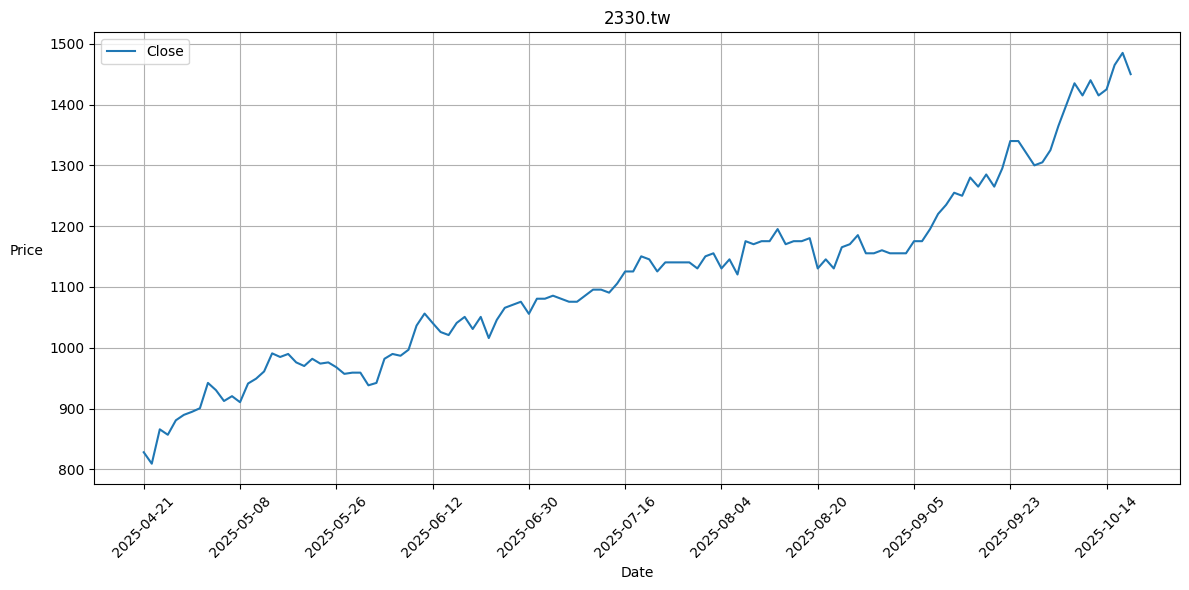

In [14]:
# Áï´Â∏ÉÂ∞∫ÂØ∏Â§ßÂ∞èË®≠ÂÆö
plt.figure(figsize=(12, 6))

# Ë®≠ÂÆöË¶ÅÁπ™Ë£ΩÁöÑË≥áÊñôÊ¨Ñ‰Ωç
plt.plot(new_df['Close'], label='Close')

# Ë®≠ÂÆö x Ëª∏ÁöÑÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num], rotation = 45)

# Ë®≠ÂÆöÂúñË°®ÁöÑÊ®ôÈ°åÔºåx Ëª∏Âíå y Ëª∏ÁöÑÊ®ôÁ±§
plt.title(f'{stock_id}')   # Â∞áËÇ°Á•®‰ª£ËôüË®≠ÁÇ∫ÂúñÊ®ô
plt.xlabel('Date')         # x Ëª∏Ê®ôÁ±§
plt.ylabel('Price', rotation=0, ha='right')  # y Ëª∏Ê®ôÁ±§
plt.legend(loc='upper left') # Âú®Â∑¶‰∏äËßíÈ°ØÁ§∫Âúñ‰æã
plt.grid(True) # Âú®Âúñ‰∏äÈ°ØÁ§∫Á∂≤Ê†º
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()

### 1Ô∏è‚É£4Ô∏è‚É£ Âä†ÂÖ•Êàê‰∫§Èáè

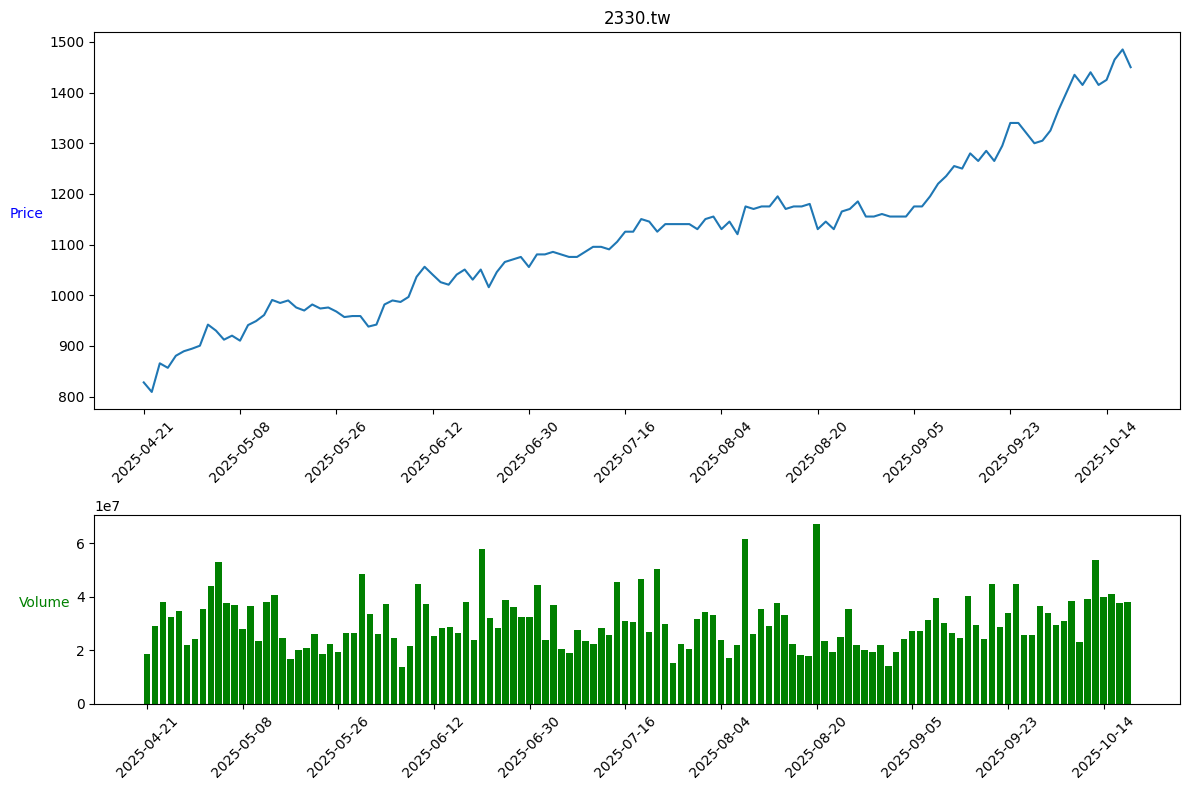

In [15]:
# ÂâµÂª∫ÂÖ©ÂºµÂ≠êÂúñ
fig, (ax1, ax2) = plt.subplots(2, 1,
                figsize=(12, 8),
                gridspec_kw={'height_ratios': [2, 1]})

# Ë®≠ÂÆö x Ëª∏ÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# Áπ™Ë£ΩÊî∂Áõ§ÂÉπ
ax1.plot(new_df['Close'], label='Close')
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num], rotation=45)

# Áπ™Ë£Ω‰∫§ÊòìÈáè
ax2.bar(new_df.index,  new_df['Volume'].values.reshape(len(new_df)), color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')
ax2.set_xticks([]) # ‰∏çÈ°ØÁ§∫Êó•ÊúüÊ®ôÁ±§
# Ëã•Ë¶ÅÈ°ØÁ§∫ÂúñË°®Ê®ôÁ±§ÂèØ‰ª•‰ΩøÁî®‰ª•‰∏ãÁ®ãÂºèÁ¢º
ax2.set_xticks(date[::len(date)//num].index)
ax2.set_xticklabels(date[::len(date)//num], rotation=45)

# ËÆìÂ≠êÂúñÂ°´ÂÖÖ„ÄÅÂ∞çÈΩä
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()


### 1Ô∏è‚É£5Ô∏è‚É£ Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

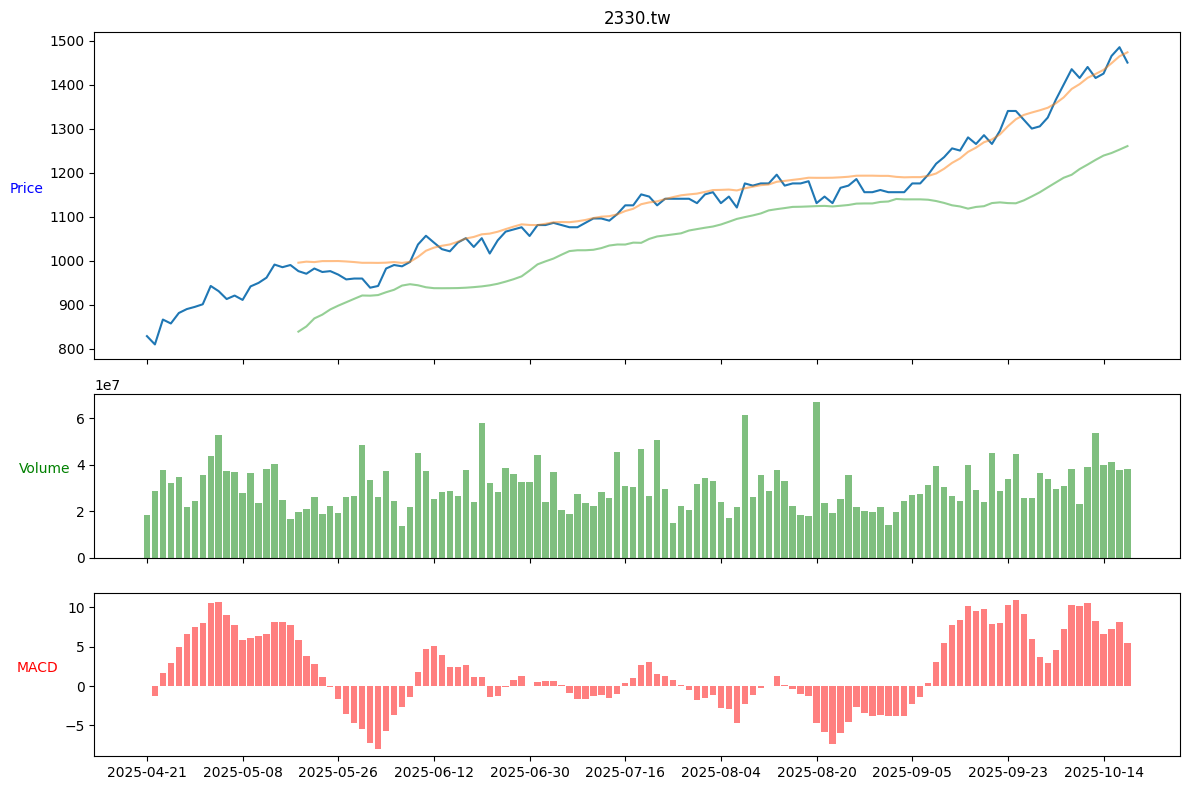

In [16]:
# ÂâµÂª∫‰∏âÂÄãÂ≠êÂúñ
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# Ë®≠ÂÆö x Ëª∏ÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# Áπ™Ë£ΩÊî∂Áõ§ÂÉπ
ax1.plot(new_df['Close'], label='Close')
# Âä†ÂÖ•Â∏ÉÊûóÈÄöÈÅì
ax1.plot(new_df['Upper_Band'], alpha=0.5) # alpha Ë®≠ÂÆöÈÄèÊòéÂ∫¶
ax1.plot(new_df['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num])

# Áπ™Ë£Ω‰∫§ÊòìÈáè
ax2.bar(new_df.index, new_df['Volume'].values.reshape(len(new_df)), alpha=0.5, color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')

# Áπ™Ë£ΩÊäÄË°ìÊåáÊ®ô
ax3.bar(new_df.index, new_df['MACD_Histogram'].values.reshape(len(new_df)), alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# Ë™øÊï¥Â≠êÂúñÈñìÁöÑË∑ùÈõ¢
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()

### Áπ™Ë£Ω K Á∑öÂúñÔºömplfinance

### 1Ô∏è‚É£6Ô∏è‚É£ ÂåØÂÖ•ÊäÄË°ìÂàÜÊûêÁπ™ÂúñÂ•ó‰ª∂

In [17]:
!pip install mplfinance -U
import mplfinance as mpf

### 1Ô∏è‚É£7Ô∏è‚É£ ÈÅ∏ÊìáË≥áÊñôÊôÇÈñì

In [18]:
kplot_df = new_df.set_index('Date')
#kplot_df = kplot_df['2024-02-01':'2024-07-29']
kplot_df.tail()

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits     MA_8        MA_13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                EMA_12       EMA_26  MACD_Line  Signal_Line  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram        RSI       SMA_20  \
Date                                                                
2025-10-13 00:00:00+08:00        8.330076  69.305693  1326.501990   
2025-10-14 00:00:00+08:00        6.637946  70.378682  1335.999005   
2025-10-15 00:00:00+08:00        7.305553  74.255431  1346.500000   
2025-10-16 00:00:00+08:00        8.124198  75.950269  1358.250000   
2025-10-17 00:00:00+08:00        5.466107  67.567231  1366.750000   

                           Rolling_Std_20   Upper_Band   Lower_Band  \
Date                                                                  
2025-10-13 00:00:00+08:00       65.109998  1424.166987  1228.836992   
2025-10-14 00:00:00+08:00       64.922311  1433.382472  1238.615538   
2025-10-15 00:00:00+08:00       68.038302  1448.557453  1244.442547   
2025-10-16 00:00:00+08:00       70.734399  1464.351599  1252.148401   
2025-10-17 00:00:00+08:00       71.049927  1473.324890  1260.175110   

                                  OBV  
Date                                   
2025-10-13 00:00:00+08:00   918434351  
2025-10-14 00:00:00+08:00   958323607  
2025-10-15 00:00:00+08:00   999380012  
2025-10-16 00:00:00+08:00  1037117690  
2025-10-17 00:00:00+08:00   999040359

### 1Ô∏è‚É£8Ô∏è‚É£ Áî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ

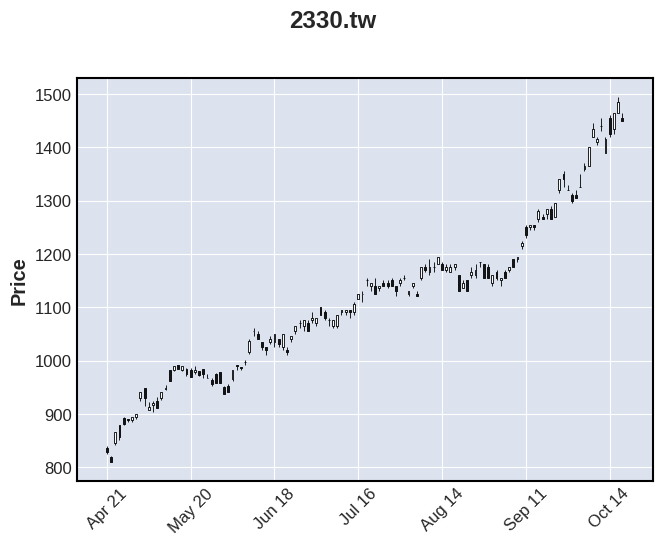

In [19]:
mpf.plot(kplot_df, type='candle', title=f'{stock_id}')

### 1Ô∏è‚É£9Ô∏è‚É£ Âä†ÂÖ•Áπ™ÂúñË®≠ÂÆö

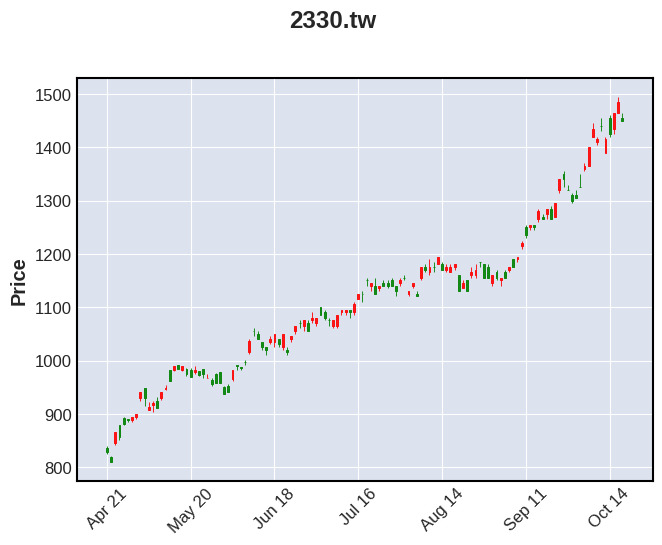

In [20]:
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)
# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}')

### 2Ô∏è‚É£0Ô∏è‚É£ Âä†ÂÖ•Â≠êÂúñ

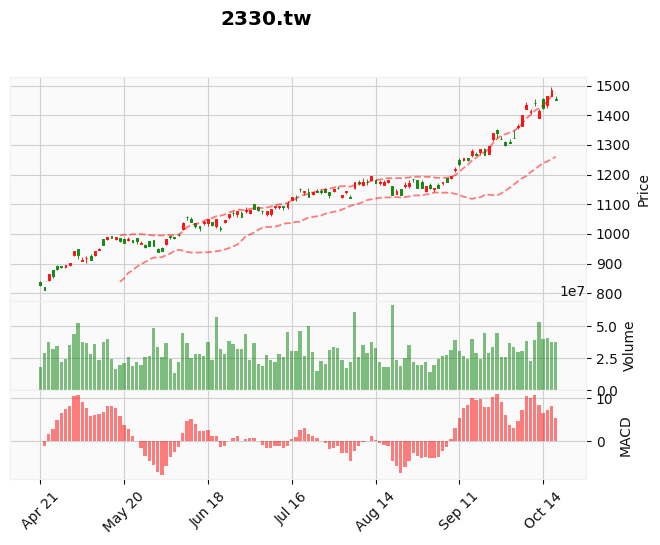

In [21]:
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',
                marketcolors=my_color)

# ‰∫§ÊòìÈáèÂíåÊäÄË°ìÊåáÊ®ôÂ≠êÂúñ
ap = [
    # ‰∏äËªåÁ∑ö
    mpf.make_addplot(kplot_df['Upper_Band'], color='red',
                      alpha=0.5, linestyle='--'),
    # ‰∏ãËªåÁ∑ö
    mpf.make_addplot(kplot_df['Lower_Band'], color='red',
                     alpha=0.5, linestyle='--'),
    # Êàê‰∫§Èáè
    mpf.make_addplot(kplot_df['Volume'], panel=1, type='bar',
                     color='g', alpha=0.5, ylabel='Volume'),
    # MACD
    mpf.make_addplot(kplot_df['MACD_Histogram'], panel=2, type='bar',
                     color='r', alpha=0.5, ylabel='MACD')
]

# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle', addplot=ap,
          style=my_style, title=f'{stock_id}')

## 4-3 plotly ‰∫íÂãïÂºèÂúñË°®

### 2Ô∏è‚É£1Ô∏è‚É£ Ê™¢Ë¶ñË≥áÊñô

In [22]:
bk_df = new_df
bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')
bk_df.tail()

Date    Open    High     Low   Close  \
Date                                                                   
2025-10-13 2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0   
2025-10-14 2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0   
2025-10-15 2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0   
2025-10-16 2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0   
2025-10-17 2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0   

              Volume  Dividends  Stock Splits     MA_8        MA_13  ...  \
Date                                                                 ...   
2025-10-13  53850992        0.0           0.0  1387.50  1361.153846  ...   
2025-10-14  39889256        0.0           0.0  1402.50  1371.153846  ...   
2025-10-15  41056405        0.0           0.0  1420.00  1380.769231  ...   
2025-10-16  37737678        0.0           0.0  1435.00  1391.923077  ...   
2025-10-17  38077331        0.0           0.0  1441.25  1401.923077  ...   

                 EMA_26  MACD_Line  Signal_Line  MACD_Histogram        RSI  \
Date                                                                         
2025-10-13  1311.738816  58.940207    50.610131        8.330076  69.305693   
2025-10-14  1320.128534  58.907563    52.269618        6.637946  70.378682   
2025-10-15  1330.859753  61.401559    54.096006        7.305553  74.255431   
2025-10-16  1342.277549  64.251254    56.127056        8.124198  75.950269   
2025-10-17  1350.256990  62.959689    57.493582        5.466107  67.567231   

                 SMA_20  Rolling_Std_20   Upper_Band   Lower_Band         OBV  
Date                                                                           
2025-10-13  1326.501990       65.109998  1424.166987  1228.836992   918434351  
2025-10-14  1335.999005       64.922311  1433.382472  1238.615538   958323607  
2025-10-15  1346.500000       68.038302  1448.557453  1244.442547   999380012  
2025-10-16  1358.250000       70.734399  1464.351599  1252.148401  1037117690  
2025-10-17  1366.750000       71.049927  1473.324890  1260.175110   999040359  

[5 rows x 21 columns]

### 2Ô∏è‚É£2Ô∏è‚É£ ÂåØÂÖ• plotly Â•ó‰ª∂

In [23]:
import plotly.graph_objects as go

### 2Ô∏è‚É£3Ô∏è‚É£ Áπ™Ë£Ω‰∫íÂãïÂºè K Á∑öÂúñ

In [24]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# Ë™øÊï¥ÂØ¨È´ò
fig.update_layout(
    height=800,
    width=1200
)

# È°ØÁ§∫ÂúñË°®
fig.show()

### 2Ô∏è‚É£4Ô∏è‚É£ ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
Ëß£Ê±∫Áπ™Âúñ‰∏çÈÄ£Á∫åÂïèÈ°å

In [25]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# Ë™øÊï¥ÂØ¨È´ò
fig.update_layout(
    height=800,
    width=1200
)

# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
# ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
all_dates = pd.date_range(start=bk_df.index.min(),
              end=bk_df.index.max())
# ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)]
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

# È°ØÁ§∫ÂúñË°®
fig.show()

/tmp/ipython-input-1835360458.py:21: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£5Ô∏è‚É£ Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏

In [26]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])


# ÂúñË°®Êõ¥Êñ∞-Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_layout(
    height=800,
    width=1200
)


# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)] # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

/tmp/ipython-input-3746432464.py:24: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£6Ô∏è‚É£ Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

In [27]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red', decreasing_line_color='green',
            name = "K Á∑ö")])


# Â∏ÉÊûóÈÄöÈÅì
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Upper_Band'],mode='lines',
    line={'color': 'green','dash': 'dash'},name = "‰∏äËªåÁ∑ö"))
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Lower_Band'], mode='lines',
    line={'color': 'green', 'dash': 'dash'},name = "‰∏ãËªåÁ∑ö"))

# ‰∫§ÊòìÈáè
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['Volume'], marker={'color': 'green'},
      yaxis='y2', name = "‰∫§ÊòìÈáè"))

# MACD
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['MACD_Histogram'], marker={'color': 'red'},
      yaxis='y3', name = "MACD"))

# Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="toaxis")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")

# Êõ¥Êñ∞Áï´Â∏ÉÂ§ßÂ∞è‰∏¶Â¢ûÂä†ÁØÑÂúçÈÅ∏Êìá
fig.update_layout(
    height=800,
    yaxis={'domain': [0.35, 1]},
    yaxis2={'domain': [0.15, 0.3]},
    yaxis3={'domain': [0, 0.15]},
    title=f"{stock_id}",
    xaxis={
        # ÁØÑÂúçÈÅ∏ÊìáÊ†º
        'rangeselector': {
            'buttons': [
                {'count': 1, 'label': '1M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 6, 'label': '6M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 1, 'label': '1Y',
                  'step': 'year', 'stepmode': 'backward'},
                {'step': 'all'}
            ]
        },
        # ÁØÑÂúçÊªëÂãïÊ¢ù
        'rangeslider': {
            'visible': True,
            # ÊªëÂãïÊ¢ùÁöÑÈ´òÂ∫¶ (Ë®≠ÁΩÆ 0.01 Â∞±ÊúÉËÆäÂñÆÁ¥îÁöÑ bar)
            'thickness': 0.01,
            'bgcolor': "#E4E4E4"  # ËÉåÊôØËâ≤
        },
        'type': 'date'
    }
)


# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)] # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

/tmp/ipython-input-3180122684.py:69: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£7Ô∏è‚É£ ÂØ´ÊàêÂáΩÂºè

In [28]:
# ‰∏ãËºâË≥áÊñô‰∏¶ËÆì AI Ë®àÁÆóÊåáÊ®ô
def download_stock_data(stock_id, start=None, end=None, indicator='MACD'):
    stock_id = f"{stock_id}.tw"
    if not end:
        end = dt.date.today()
    if not start:
        start = end - dt.timedelta(days=365)
    # Âæû yf ‰∏ãËºâË≥áÊñô
    #df = yf.download(stock_id, start=start, end=end).reset_index()
    df = yf.Ticker(stock_id).history(start=start, end=end)

    # AI Ë®àÁÆóÊäÄË°ìÊåáÊ®ô
    code_str = ai_helper(df, f"Ë®àÁÆó{indicator}")
    code_str=code_str.replace('```','')
    code_str=code_str.replace('python','')
    print(code_str)

    # Â∞á exec ÁîüÊàêÁöÑ calculate Ë®≠ÁÇ∫Â±ÄÈÉ®ËÆäÊï∏
    local_vars = {}
    exec(code_str, globals(), local_vars)
    calculate = local_vars['calculate']

    df = calculate(df)

    # Ë≥áÊñôËôïÁêÜ
    bk_df = df.reset_index()
    bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')

    return bk_df

# Áπ™Ë£ΩÂúñË°®ÂáΩÂºè
def create_stock_figure(stock_id, bk_df):

    # ÂâµÂª∫ K Á∑öÂúñ
    fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
                        open=bk_df['Open'],
                        high=bk_df['High'],
                        low=bk_df['Low'],
                        close=bk_df['Close'],
                        increasing_line_color='red',
                        decreasing_line_color='green',
                        name = "K Á∑ö")])

    # ‰∫§ÊòìÈáè
    fig.add_trace(go.Bar(x=bk_df.index, y=bk_df['Volume'],
                         marker={'color': 'green'}, yaxis='y2',
                           name = "‰∫§ÊòìÈáè"))

    # ÊâæÂá∫ÈúÄË¶ÅÁπ™Ë£ΩÁöÑÊ¨Ñ‰Ωç
    columns = bk_df.columns
    exclude_columns = ['index','Date', 'Open', 'High',
                        'Low', 'Close', 'Adj Close', 'Volume']
    remain_columns = [col for col in columns if
                       col not in exclude_columns]
    min_close = bk_df['Close'].min() - bk_df['Close'].std()
    max_close = bk_df['Close'].max() + bk_df['Close'].std()
    # Áπ™Ë£ΩÊäÄË°ìÊåáÊ®ô
    for i in remain_columns:
      if min_close <= bk_df[i].mean() <= max_close:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', name=i))
      else:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', yaxis='y3', name=i))

    # Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
    fig.update_xaxes(showspikes=True, spikecolor="gray",
                    spikemode="toaxis")
    fig.update_yaxes(showspikes=True, spikecolor="gray",
                    spikemode="across")
    # Êõ¥Êñ∞Áï´Â∏ÉÂ§ßÂ∞è‰∏¶Â¢ûÂä†ÁØÑÂúçÈÅ∏Êìá
    fig.update_layout(
        height=800,
        width=1200,
        yaxis={'domain': [0.35, 1]},
        yaxis2={'domain': [0.15, 0.3]},
        # Ëã•Ë¶ÅÈáçÁñä y1 Âíå y3, ÂèØ‰ª•ÊîπÊàê
        # yaxis3=dict(overlaying='y', side='right')
        yaxis3={'domain': [0, 0.15]},
        title=f"{stock_id}",
        xaxis={
            # ÁØÑÂúçÈÅ∏ÊìáÊ†º
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 1, 'label': '1Y',
                      'step': 'year', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            # ÁØÑÂúçÊªëÂãïÊ¢ù
            'rangeslider': {
                'visible': True,
                'thickness': 0.01,  # ÊªëÂãïÊ¢ùÁöÑÈ´òÂ∫¶
                'bgcolor': "#E4E4E4"  # ËÉåÊôØËâ≤
            },
            'type': 'date'
        }
    )

    # ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
    # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
    all_dates = pd.date_range(start=bk_df.index.min(),
                               end=bk_df.index.max())
    # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
    breaks = all_dates[~all_dates.isin(bk_df.index)]
    dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®Ê†ºÂºè
    fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

    return fig

# ‰∏ªÂáΩÂºè
def plotly_stock(stock_id, start=None, end=None, indicator='MACD'):

    df = download_stock_data(stock_id, start, end, indicator)
    fig = create_stock_figure(stock_id,df)
    fig.show()

### 2Ô∏è‚É£8Ô∏è‚É£ Âü∑Ë°åÂáΩÂºè

In [30]:
plotly_stock("2454", start='2022-01-01', end= None, indicator='Â∏ÉÊûóÈÄöÈÅì Âèä MACD')


import pandas as pd

def calculate(df):
    """
    Calculates Bollinger Bands and MACD and adds them to the dataframe.

    Parameters:
    df (pd.DataFrame): The input dataframe with 'Close' price.

    Returns:
    pd.DataFrame: The dataframe with Bollinger Bands and MACD indicators added.
    """

    # --- Bollinger Bands Calculation ---
    # 20-period Simple Moving Average (SMA)
    df['BB_Middle_Band'] = df['Close'].rolling(window=20).mean()
    # 20-period Standard Deviation
    df['BB_StdDev'] = df['Close'].rolling(window=20).std()
    # Upper Band (Middle Band + 2 * StdDev)
    df['BB_Upper_Band'] = df['BB_Middle_Band'] + (df['BB_StdDev'] * 2)
    # Lower Band (Middle Band - 2 * StdDev)
    df['BB_Lower_Band'] = df['BB_Middle_Band'] - (df['BB_StdDev'] * 2)

    # --- MACD Calculation ---
    # 12-period Exponential Moving Average (EMA)
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    # 26-period Exponential Moving Average (EMA)
    df['EMA_26'] = df['Clo

/tmp/ipython-input-1935600896.py:109: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

